In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexmartinez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexmartinez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexmartinez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alexmartinez/nltk_data...


True

In [5]:
#To read the file copy the path and replace below
beer = pd.read_csv('~/Desktop/BeerRecommender/beer_profile_and_ratings.csv')

In [12]:
beer['Description'][0]

'Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored "alt" style beer notably well balanced.\\t'

In [6]:
def visualize_data(data):
    # Print the shape of the DataFrame (number of rows and columns)
    print("Shape of the DataFrame:", data.shape)

    # Print the column names
    print("\nColumn names:")
    print(data.columns.tolist())

    # Print the data types of each column
    print("\nData types:")
    print(data.dtypes)

    # Print basic statistics of numeric columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if numeric_cols:
        print("\nBasic statistics of numeric columns:")
        print(data[numeric_cols].describe())

    # Print the number of missing values in each column
    missing_values = data.isnull().sum()
    if missing_values.any():
        print("\nMissing values:")
        print(missing_values)

    # Print a sample of the DataFrame
    print("\nSample data:")
    print(data.head())

# Example usage:
visualize_data(beer)


Shape of the DataFrame: (3197, 25)

Column names:
['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall', 'number_of_reviews']

Data types:
Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate     

# EDA

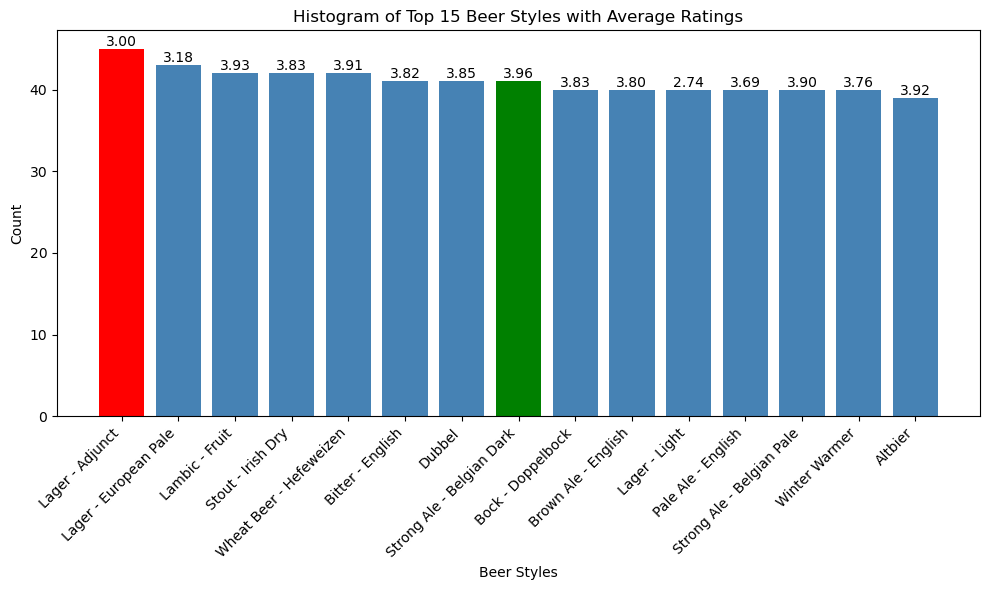

In [83]:
import matplotlib.pyplot as plt

def plot_styles_histogram(data):
    # Group the data by style and calculate the average rating and count for each style
    style_stats = data.groupby('Style').agg({'review_overall': 'mean', 'Style': 'count'})
    style_stats.columns = ['avg_rating', 'count']
    style_stats = style_stats.nlargest(15, 'count')

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(style_stats.index, style_stats['count'], color='steelblue')

    # Find the style with the highest count
    most_common_style = style_stats['count'].idxmax()
    highest_rating_style = style_stats['avg_rating'].idxmax()

    # Highlight the style with the highest count in red
    max_count = style_stats['count'].max()
    max_index = style_stats.index.get_loc(most_common_style)
    plt.bar(max_index, max_count, color='red')
    
    
    highest_rating = style_stats['avg_rating'].max()
    highest_rating_index = style_stats.index.get_loc(highest_rating_style)
    plt.bar(highest_rating_index, style_stats.loc[highest_rating_style, 'count'], color='green')

    # Add average ratings as text labels to the plot
    for i, style in enumerate(style_stats.index):
        avg_rating = style_stats.loc[style, 'avg_rating']
        plt.text(i, style_stats.loc[style, 'count'], f"{avg_rating:.2f}",
                 ha='center', va='bottom')

    # Set labels and title
    plt.xlabel('Beer Styles')
    plt.ylabel('Count')
    plt.title('Histogram of Top 15 Beer Styles with Average Ratings')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_styles_histogram(beer)


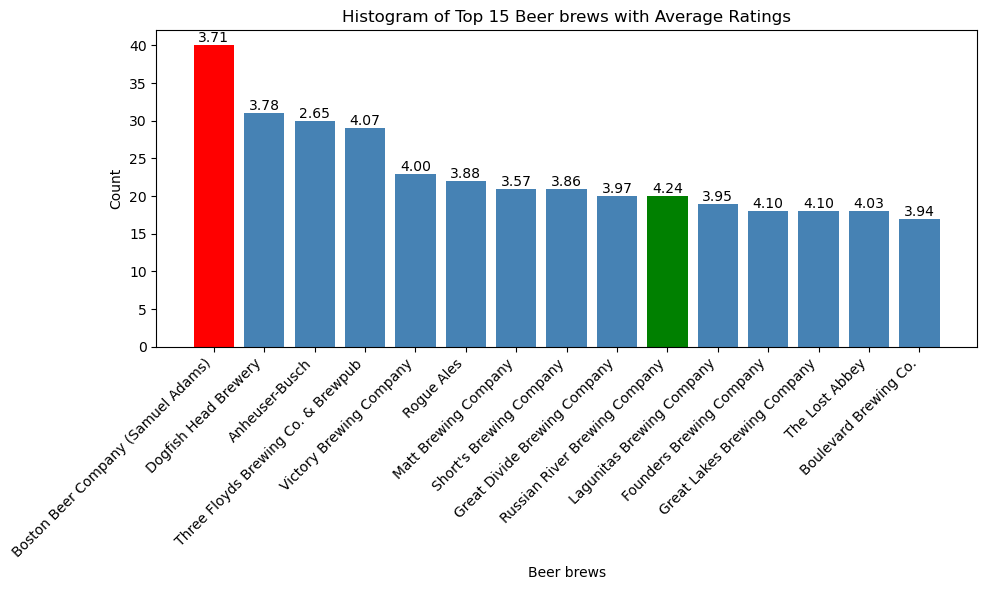

In [85]:
def plot_brews_histogram(data):
    # Group the data by brew and calculate the average rating and count for each brew
    brew_stats = data.groupby('Brewery').agg({'review_overall': 'mean', 'Brewery': 'count'})
    brew_stats.columns = ['avg_rating', 'count']
    brew_stats = brew_stats.nlargest(15, 'count')

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(brew_stats.index, brew_stats['count'], color='steelblue')

    # Find the brew with the highest count
    most_common_brew = brew_stats['count'].idxmax()
    highest_rating_brew = brew_stats['avg_rating'].idxmax()

    # Highlight the brew with the highest count in red
    max_count = brew_stats['count'].max()
    max_index = brew_stats.index.get_loc(most_common_brew)
    plt.bar(max_index, max_count, color='red')
    
    
    highest_rating = brew_stats['avg_rating'].max()
    highest_rating_index = brew_stats.index.get_loc(highest_rating_brew)
    plt.bar(highest_rating_index, brew_stats.loc[highest_rating_brew, 'count'], color='green')

    # Add average ratings as text labels to the plot
    for i, brew in enumerate(brew_stats.index):
        avg_rating = brew_stats.loc[brew, 'avg_rating']
        plt.text(i, brew_stats.loc[brew, 'count'], f"{avg_rating:.2f}",
                 ha='center', va='bottom')

    # Set labels and title
    plt.xlabel('Beer brews')
    plt.ylabel('Count')
    plt.title('Histogram of Top 15 Beer brews with Average Ratings')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_brews_histogram(beer)


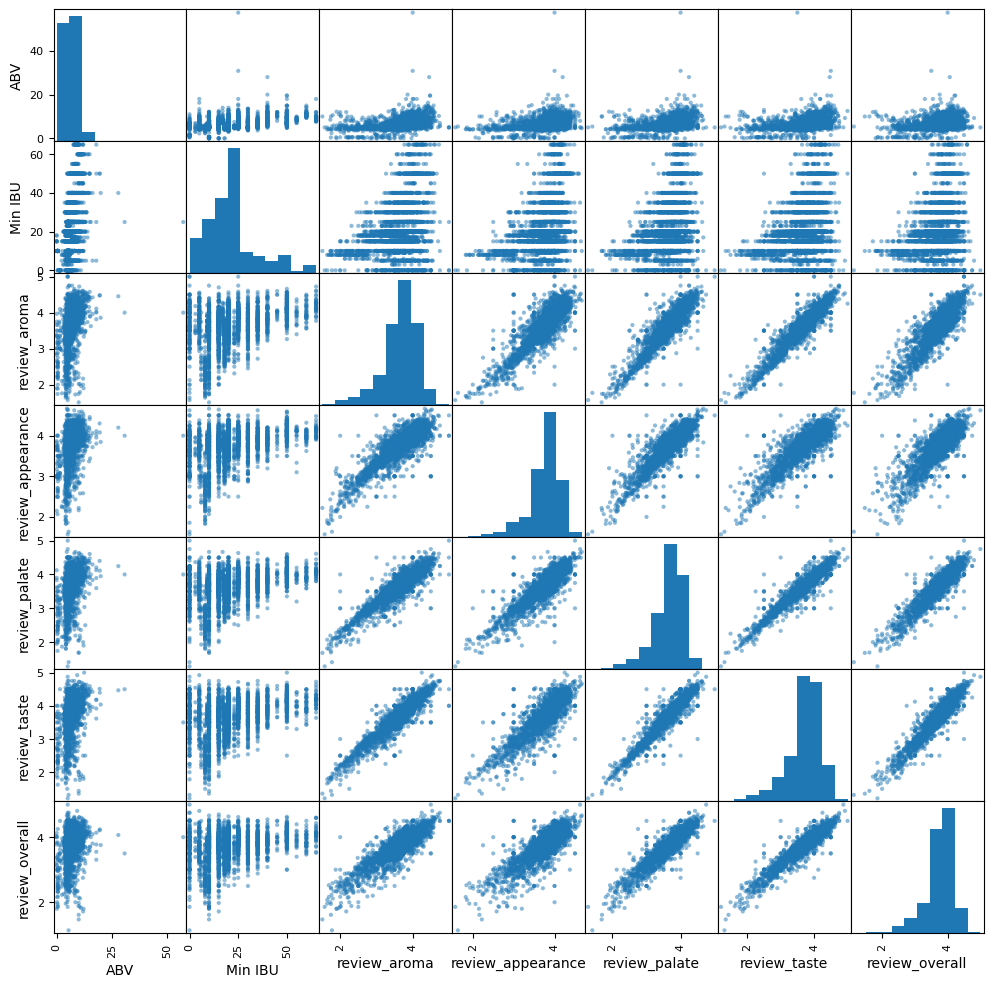

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

def create_scatter_matrix(data):
    pd.plotting.scatter_matrix(data, figsize=(12, 12))
    plt.show()

# Example usage:
create_scatter_matrix(beer[['ABV', 'Min IBU', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']])


# Description

In [13]:
beer['Description']

0       Notes:Richly malty and long on the palate, wit...
1       Notes:This malty, full-bodied double alt is al...
2       Notes:Long Trail Ale is a full-bodied amber al...
3                                                  Notes:
4       Notes:Called 'Dark Double Alt' on the label.Se...
                              ...                        
3192                                               Notes:
3193    Notes:This hearty American pale ale contains a...
3194                                               Notes:
3195                                               Notes:
3196    Notes:The essence of Christmas is captured in ...
Name: Description, Length: 3197, dtype: object

In [20]:
def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text.lower())

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the words to their base form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [79]:
descriptions = beer['Description'].apply(preprocess_text)
descriptions = descriptions.map(lambda x: x.replace('note',''))

In [84]:
descriptions = descriptions[descriptions != '']
indexes = descriptions.index
desc_df = beer.loc[indexes]
#descriptions = descriptions.tolist()

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Vectorize the preprocessed descriptions
description_vectors = vectorizer.fit_transform(descriptions)

# Convert the sparse matrix to a DataFrame
description_df = pd.DataFrame(description_vectors.toarray(), columns=vectorizer.get_feature_names())

/Users/alexmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
description_df

,000,012,02,05,056,056alcohol,057,058color,06,060,...,ölbutikken,único,über,überalt,đá,ﬁne,ﬁnish,ﬂagship,ﬂavors,ﬂoral
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
